### Dataset 

The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. Therefore, using the following two lines we can import TensorFlow and MNIST dataset under the Keras API.


In [ ]:
import tensorflow as tf
#to chack if gpu is activated. If 0, then check the runtime settings of colab
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Num of GPUs Available:  1


The MNIST database contains 60,000 training images and 10,000 testing images. The inbuilt functions allow to separate them into two groups as train and test. x_train and x_test parts contain greyscale codes (from 0 to 255) while y_train and y_test parts contain labels from 0 to 9 which represents which number they actually are. To visualize these numbers, we can get help from matplotlib.

You can set the image_index to be any number between 0 and 60000.

3


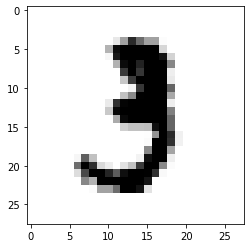

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 10 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

When we run the code above, we will get the greyscale visualization of the RGB codes as shown above. Then, run the below code to get more info about the dataset.

In [ ]:
x_train.shape

(60000, 28, 28)

You will get (60000, 28, 28). 60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixel.

To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


You can see that the shape of the train dataset changed from (60000, 28, 28) to (60000, 28, 28, 1). The images are also normalized, between the values of 0 and 1.

### Defining the Model

Next process is to define the structure of the model. We will build our model by using high-level Keras API which uses either TensorFlow or Theano on the backend. We are importing the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. The important layers are Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.

You can experiment with any number for the first Dense layer; however, the final Dense layer must have 10 neurons since we have 10 number classes (0, 1, 2, …, 9). You may always experiment with kernel size, pool size, activation functions, dropout rate, and a number of neurons in the first Dense layer to get a better result.

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

### Compiling and Training of the Model



In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2111 - accuracy: 0.9368
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

If you want you can change the optimizer, loss function, metrics, and epochs. However, generally the adam optimizer usually out-performs the other optimizers.The epoch number might seem a bit small. However, you will reach to 98–99% test accuracy. 

### Note
Keep in mind when chaning the loss function. We are currently doing a multiclass classification, so we cannot have any loss function working in our case. Here, `sparse_categorical_crossentropy` is used because the last dimension is sparse. Only 1 out of the 10 classes will be `1`, all others are `0`.

### Evaluation
you can evaluate the trained model with x_test and y_test using one line of code. This step compares the model's accuracy in the test dataset. 

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9857


[0.06038759648799896, 0.9857000112533569]

Thus, we see that our model has got a good accuracy of `98%` in the test dataset.